## Лабораторная работа 1

#### Модель Леонтьева, анализ таблицы ["затраты-выпуск" (IOTs)](https://stats.oecd.org/viewhtml.aspx?datasetcode=IOTS_2021) для Китая 2018 и 2013 годов.

1. В таблице  выделяем Z
2. Строим по ней матрицу А (и вектор Х)
3. Исследуем на симметричность (с погрешностью), неотрицательность, продуктивность
4. Удаление отраслей. Ввод: номера, которые нужно удалить. Вывод: матрица А, матрица В (с нужными отраслями), числа Фробениуса-Перрона для обеих матриц. Проверка качества близовстью чисел Ф.-П.
5. Агрегирование матрицы Леонтьева. Ввод: группы I1...Is. Дальше аналогично пункту 4
6. Построение графов первого и второго порядков di и ddi (ориентированых, направления определяются с помощью аij)


### Отраслевая структура, 2020 г.
[Источник](https://moneymakerfactory.ru/spravochnik/ekonomika-kitaya-vvp/).
В валовом продукте Китая (101,6 трлн ¥) наибольшая доля приходится на:
- промышленность – 31,30 трлн ¥;
- оптовая и розничная торговля – 9,57 трлн ¥;
- финансы – 8,41 трлн ¥;
- сельское хозяйство  – 8,11 трлн ¥;
- недвижимость – 7,46 трлн ¥;
- строительство – 7,3 трлн ¥.

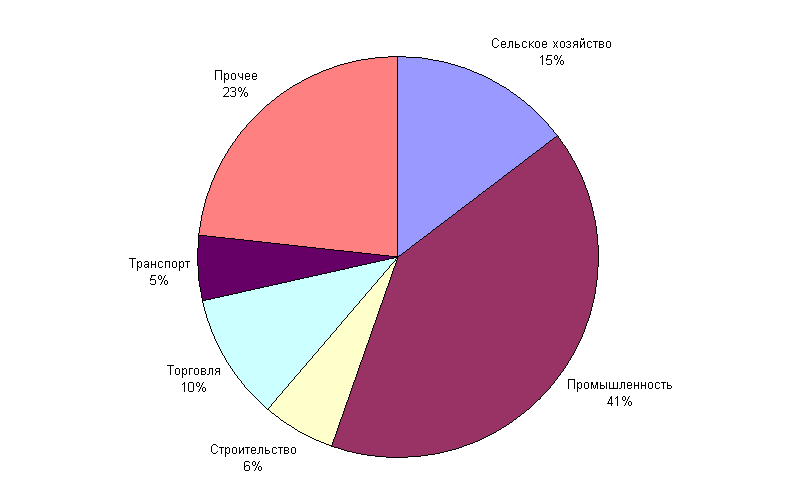

### Динамика структуры экономики Китая, 1970-2010 гг.
[Источника](https://be5.biz/ekonomika2/002/china.htm).

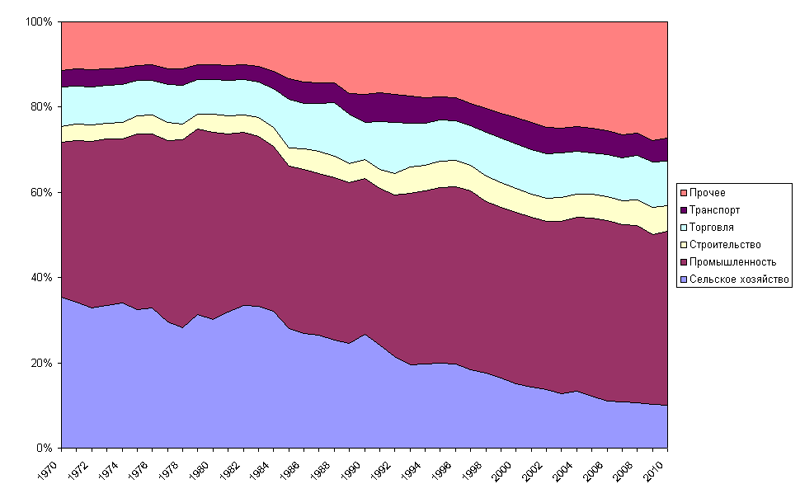

### Анализ матрицы для Китая 2018 г.

In [110]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from IPython.display import display
file_name = "china.csv"
df = pd.read_csv(file_name, encoding = "ISO-8859-1")
df = df.dropna(thresh=2, axis = 1)
display(df)


To industry / sector  \
0           TTL_01T02: Agriculture, hunting, forestry   
1                     TTL_03: Fishing and aquaculture   
2   TTL_05T06: Mining and quarrying, energy produc...   
3   TTL_07T08: Mining and quarrying, non-energy pr...   
4           TTL_09: Mining support service activities   
5     TTL_10T12: Food products, beverages and tobacco   
6   TTL_13T15: Textiles, textile products, leather...   
7          TTL_16: Wood and products of wood and cork   
8              TTL_17T18: Paper products and printing   
9         TTL_19: Coke and refined petroleum products   
10             TTL_20: Chemical and chemical products   
11  TTL_21: Pharmaceuticals, medicinal chemical an...   
12               TTL_22: Rubber and plastics products   
13        TTL_23: Other non-metallic mineral products   
14                               TTL_24: Basic metals   
15                  TTL_25: Fabricated metal products   
16  TTL_26: Computer, electronic and optical equip...   
17                       TTL_27: Electrical equipment   
18               TTL_28: Machinery and equipment, nec   
19  TTL_29: Motor vehicles, trailers and semi-trai...   
20                  TTL_30: Other transport equipment   
21  TTL_31T33: Manufacturing nec; repair and insta...   
22  TTL_35: Electricity, gas, steam and air condit...   
23  TTL_36T39: Water supply; sewerage, waste manag...   
24                            TTL_41T43: Construction   
25  TTL_45T47: Wholesale and retail trade; repair ...   
26  TTL_49: Land transport and transport via pipel...   
27                            TTL_50: Water transport   
28                              TTL_51: Air transport   
29  TTL_52: Warehousing and support activities for...   
30              TTL_53: Postal and courier activities   
31  TTL_55T56: Accommodation and food service acti...   
32  TTL_58T60: Publishing, audiovisual and broadca...   
33                         TTL_61: Telecommunications   
34       TTL_62T63: IT and other information services   
35      TTL_64T66: Financial and insurance activities   
36                     TTL_68: Real estate activities   
37  TTL_69T75: Professional, scientific and techni...   
38     TTL_77T82: Administrative and support services   
39  TTL_84: Public administration and defence; com...   
40                                  TTL_85: Education   
41  TTL_86T88: Human health and social work activi...   
42      TTL_90T93: Arts, entertainment and recreation   
43                TTL_94T96: Other service activities   
44  TTL_97T98: Activities of households as employe...   
45  TXS_IMP_FNL: Taxes less subsidies on intermedi...   
46  TXS_INT_FNL: Taxes less subsidies on intermedi...   
47  TTL_INT_FNL: Total intermediate consumption at...   
48                  VALU: Value added at basic prices   
49                     OUTPUT: Output at basic prices   

   D01T02: Agriculture, hunting, forestry D03: Fishing and aquaculture  \
0                              416 562.10                    17 333.30   
1                                   868.7                    20 075.70   
2                                1 864.50                        103.3   
3                                    25.4                          3.2   
4                                     1.6                          0.1   
5                              186 038.50                    27 572.00   
6                                1 032.30                         51.8   
7                                    61.6                         15.7   
8                                   562.2                        160.7   
9                               12 409.00                     4 313.30   
10                             169 369.80                     1 488.90   
11                              18 133.50                     2 249.90   
12                              22 514.80                        474.5   
13                                  991.3                        546.6   
14             

### Общий вид межотраслевого баланса представим в виде таблицы: 
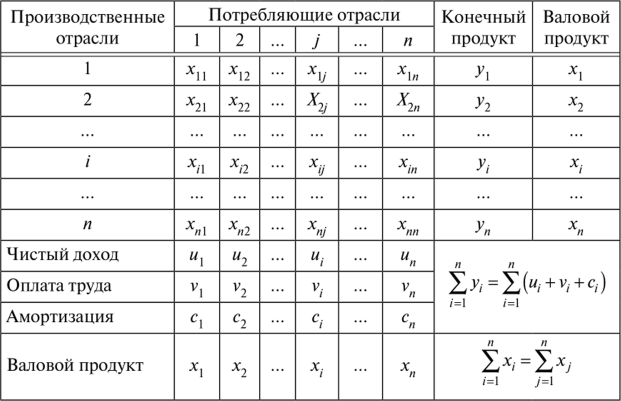

In [111]:
column_dict = {}
print('Столбцы матрицы:')
for i in range(54):
    col = df.columns[i+1]
    column_dict[i] = col
    print(i, col)
    if 'D97T98' not in col:
        df[col] = df[col].str.replace(' ', '').astype(float)

Столбцы матрицы:
0 D01T02: Agriculture, hunting, forestry
1 D03: Fishing and aquaculture
2 D05T06: Mining and quarrying, energy producing products
3 D07T08: Mining and quarrying, non-energy producing products
4 D09: Mining support service activities
5 D10T12: Food products, beverages and tobacco
6 D13T15: Textiles, textile products, leather and footwear
7 D16: Wood and products of wood and cork
8 D17T18: Paper products and printing
9 D19: Coke and refined petroleum products
10 D20: Chemical and chemical products
11 D21: Pharmaceuticals, medicinal chemical and botanical products
12 D22: Rubber and plastics products
13 D23: Other non-metallic mineral products
14 D24: Basic metals
15 D25: Fabricated metal products
16 D26: Computer, electronic and optical equipment
17 D27: Electrical equipment
18 D28: Machinery and equipment, nec
19 D29: Motor vehicles, trailers and semi-trailers
20 D30: Other transport equipment
21 D31T33: Manufacturing nec; repair and installation of machinery and equipm

In [112]:
display(df.tail(1))

To industry / sector  D01T02: Agriculture, hunting, forestry  \
49  OUTPUT: Output at basic prices                               1913100.8   

    D03: Fishing and aquaculture  \
49                      212807.0   

    D05T06: Mining and quarrying, energy producing products  \
49                                           622522.3         

    D07T08: Mining and quarrying, non-energy producing products  \
49                                           315769.9             

    D09: Mining support service activities  \
49                                 28732.4   

    D10T12: Food products, beverages and tobacco  \
49                                     1723277.6   

    D13T15: Textiles, textile products, leather and footwear  \
49                                          1511929.1          

    D16: Wood and products of wood and cork  \
49                                 237313.0   

    D17T18: Paper products and printing  ...  \
49                             475615.1  ...   

    D97T98: Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use  \
49                                                  0                                                                                    

    HFCE: Final consumption expenditure of households  \
49                                                0.0   

    NPISH: Final consumption expenditure of non-profit institutions serving households  \
49                                                0.0                                    

    GGFC: Final consumption expenditure of general government  \
49                                                0.0           

    GFCF: Gross Fixed Capital Formation  INVNT: Changes in inventories  \
49                                  0.0                            0.0   

    CONS_ABR: Direct purchases abroad by residents (imports)  \
49                                                0.0          

    CONS_NONRES: Direct purchases by non-residents (exports)  \
49                                                0.0          

    EXPO: Exports (cross border)  IMPO: Imports (cross border)  
49                           0.0                           0.0  

[1 rows x 55 columns]

In [113]:
X = np.array(df.tail(1).values.flatten()[1:46]).astype(float)
a = list(df.columns)
Z = df.drop(columns=[x for x in a if x[0] != 'D']).values
Z = np.array(Z[0:45].astype(float))
print(Z.shape, X.shape)

(45, 45) (45,)


Основным элементом модели является квадратная матрица **технологических элементов** (или матрица прямых затрат) размерности nхn: **А = |aij|**. Числа aij показывают сколько продукции отрасли i необходимо затратить для производства единицы продукции отрасли j.

**Xi** - выпуск i-го продукта в единицу времени, например, за год. Эта величина представляет собой валовой выпуск (валовой продукт).


In [114]:
def is_productive(A):
    n = len(A)
    for i in range(1,n):
        if np.linalg.det(np.eye(i) - np.matrix(A, dtype = float)[:i,:i]) < 0:
            print("Матрица D = E - A не продуктивна")
            return 0
    print("Матрица D = E - A продуктивна")
    return 1

A = np.divide(Z, X)
A[np.isnan(A)] = 0
A = np.around(A, decimals = 4)
is_productive(A)


Матрица D = E - A продуктивна


<ipython-input-114-1011a3a6015e>:10: RuntimeWarning:

invalid value encountered in true_divide



1

In [115]:
#finding zeros
print(np.where(~A.any(axis=1))[0])
print(np.where((A < 0.04).all(axis=1))[0])
print(np.where((A < 0.05).all(axis=1))[0])
print(np.where((A < 0.06).all(axis=1))[0], len(np.where((A < 0.06).all(axis=1))[0]))
print(np.where((A < 0.1).all(axis=1))[0], len(np.where((A < 0.1).all(axis=1))[0]))

[44]
[21 24 32 39 40 41 43 44]
[ 4 21 24 29 32 39 40 41 43 44]
[ 4 21 24 26 29 30 31 32 34 37 39 40 41 43 44] 15
[ 1  4 21 24 25 26 27 28 29 30 31 32 34 36 37 38 39 40 41 42 43 44] 22


**1. Исключение отраслей**

Нулевая отрасль одна:
- 44-я ***TTL_97T98: Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use.***

При округлении (A < 0.04) 8 нулевых отраслей*:
- 21-я ***D31T33: Manufacturing nec; repair and installation of machinery and equipment***
- 24-я ***D41T43: Construction***
- 32-я ***D58T60: Publishing, audiovisual and broadcasting activities***
- 39-я ***39 D84: Public administration and defence; compulsory social security***
- 40-я ***40 D85: Education***
- 41-я ***TTL_86T88: Human health and social work activities***
- 43-я ***D94T96: Other service activities***
- 44-я 

При округлении (A < 0.05) 10 нулевых отраслей:
- 4-я ***D09: Mining support service activities***
- 29-я ***D52: Warehousing and support activities for transportation***
- предыдущие 8 (*)

При округлении (A < 0.06) 15 нулевых отраслей:
- 26-я ***D09: Mining support service activities***
- 29-32 отрасли
- 34-я ***IT and other information services***
- 37-я ***D69T75: Professional, scientific and technical activities***
- 39-44 отрасли
- предыдущие отрасли

При округлении (A < 0.1) 22 нулевые отрасли:
- 1-я ***D03: Fishing and aquaculture***
- 4-я 
- 21-32 отрасли ***Manufacturing, water, electricity/gas, transport, food services, broadcast*** 
- 34-я ***D62T63: IT and other information services***
- 36-44 отрасли ***Service and non-service activities***




In [116]:
def exclusions(A, exc):
    A1 = A
    exc = np.sort(exc)[::-1]
    n = len(A)
    r = len(exc)
    permute_col = list(range(n))
    poped = [permute_col.pop(x) for x in exc] 
    permute_col += poped
    new_A = A[:, permute_col]
    #print(permute_col)

    permute_row = list(range(n))
    poped = [permute_row.pop(x) for x in exc] 
    permute_row += poped
    new_A = new_A[permute_row, :]
    
    nr = n-r
    A11 = new_A[0:nr, 0:nr]
    A22 = new_A[nr:n, nr:n]
    A21 = new_A[0:nr, nr:n]
    A12 = new_A[nr:n, 0:nr]
    #print(r, A22)
    B = np.linalg.inv(np.eye(r)-A22)
    B = np.matmul(B, A12)
    B = np.matmul(A21, B)
    B = A11 - B
    fpA = 1/max(np.linalg.eig(A1)[0])
    fpB = 1/max(np.linalg.eig(B)[0])
    return A1, B, np.real(fpA), np.real(fpB), permute_col

In [117]:
exc = np.where((A < 0.05).all(axis=1))[0]
print(exc)
_, B, fpA, fpB, _ = exclusions(np.array(A), exc)
fpA, fpB

[ 4 21 24 29 32 39 40 41 43 44]


(1.5528444448631824, 1.6121062088254041)

### Агрегирование отраслей
[Источник](https://ilostat.ilo.org/resources/concepts-and-definitions/classification-economic-activities/)

<img src="agr.jpg" alt="drawing" width="500"/>

In [118]:
agriculture = ['D01T02: Agriculture, hunting, forestry',
 'D03: Fishing and aquaculture']
agriculture_d = {}
# industry
mining_quarring = ['D05T06: Mining and quarrying, energy producing products',
 'D07T08: Mining and quarrying, non-energy producing products',
 'D09: Mining support service activities', 
 'D36T39: Water supply; sewerage, waste management and remediation activities']
mining_quarring_d = {}
manufactoring = ['D35: Electricity, gas, steam and air conditioning supply',
                 'D13T15: Textiles, textile products, leather and footwear',
                 'D16: Wood and products of wood and cork',
                 'D17T18: Paper products and printing',
                 'D19: Coke and refined petroleum products',
                 'D20: Chemical and chemical products',
                 'D21: Pharmaceuticals, medicinal chemical and botanical products',
                 'D22: Rubber and plastics products',
                 'D23: Other non-metallic mineral products',
                 'D24: Basic metals',
                 'D25: Fabricated metal products',
                 'D26: Computer, electronic and optical equipment',
                 'D27: Electrical equipment',
                 'D28: Machinery and equipment, nec',
                 'D29: Motor vehicles, trailers and semi-trailers',
                 'D30: Other transport equipment',
                 'D31T33: Manufacturing nec; repair and installation of machinery and equipment']
manufactoring_d = {}
construction = ['D41T43: Construction']
construction_d = {}
#services
market = ['D10T12: Food products, beverages and tobacco',
         'D45T47: Wholesale and retail trade; repair of motor vehicles',
         'D49: Land transport and transport via pipelines',
         'D50: Water transport',
         'D51: Air transport',
         'D52: Warehousing and support activities for transportation',
         'D53: Postal and courier activities',
         'D55T56: Accommodation and food service activities',
         'D58T60: Publishing, audiovisual and broadcasting activities',
         'D61: Telecommunications',
         'D62T63: IT and other information services',
         'D64T66: Financial and insurance activities',
         'D68: Real estate activities',
         'D69T75: Professional, scientific and technical activities',
         'D77T82: Administrative and support services',
         'D84: Public administration and defence; compulsory social security'
         ]
market_d = {}
non_market = ['D85: Education',
 'D86T88: Human health and social work activities',
 'D90T93: Arts, entertainment and recreation',
 'D94T96: Other service activities',
 'D97T98: Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use'
             ]
non_market_d = {}

for key in column_dict:
    if column_dict[key] in agriculture:
        agriculture_d[key] = column_dict[key]
        
    elif column_dict[key] in non_market:
        non_market_d[key] = column_dict[key]
        
    elif column_dict[key] in market:
        market_d[key] = column_dict[key]
        
    elif column_dict[key] in construction:
        construction_d[key] = column_dict[key]
        
    elif column_dict[key] in manufactoring:
        manufactoring_d[key] = column_dict[key]
        
    elif column_dict[key] in mining_quarring:
        mining_quarring_d[key] = column_dict[key]
        
        
agr_tmp = np.sum(Z[:, list(agriculture_d.keys())], axis = 1)
min_tmp = np.sum(Z[:, list(mining_quarring_d.keys())], axis = 1)
manuf_tmp = np.sum(Z[:, list(manufactoring_d.keys())], axis = 1)
const_tmp = np.sum(Z[:, list(construction_d.keys())], axis = 1)
market_tmp = np.sum(Z[:, list(market_d.keys())], axis = 1)
non_mar_tmp = np.sum(Z[:, list(non_market_d.keys())], axis = 1)

Z_agr = np.array([agr_tmp, min_tmp, manuf_tmp, const_tmp, market_tmp, non_mar_tmp]).T


agr_tmp = np.sum(Z_agr[list(agriculture_d.keys()), :], axis = 0)
min_tmp = np.sum(Z_agr[list(mining_quarring_d.keys()), :],  axis = 0)
manuf_tmp = np.sum(Z_agr[list(manufactoring_d.keys()), :], axis = 0)
const_tmp = np.sum(Z_agr[list(construction_d.keys()), :], axis = 0)
market_tmp = np.sum(Z_agr[list(market_d.keys()), :], axis = 0)
non_mar_tmp = np.sum(Z_agr[list(non_market_d.keys()), :],  axis = 0)

Z_agr = np.array([agr_tmp, min_tmp, manuf_tmp, const_tmp, market_tmp, non_mar_tmp])
np.around(Z_agr, decimals = 4)

array([[4.5483980e+05, 2.0397000e+03, 3.3110510e+05, 3.0318800e+04,
        7.9085820e+05, 5.6629000e+03],
       [5.8185000e+03, 1.7907450e+05, 1.2275686e+06, 3.9651000e+04,
        2.0829100e+04, 3.0908000e+03],
       [2.9802530e+05, 3.6754160e+05, 7.8684720e+06, 1.6732362e+06,
        1.2883688e+06, 2.1014070e+05],
       [1.3272000e+03, 1.2116000e+03, 4.9651000e+03, 7.9729200e+04,
        1.8142600e+04, 3.1101000e+03],
       [4.3941350e+05, 2.0272280e+05, 2.1533059e+06, 5.7556760e+05,
        2.9074478e+06, 2.0573890e+05],
       [4.6926000e+03, 4.2814000e+03, 1.9563000e+04, 9.9437000e+03,
        6.3370500e+04, 3.7361000e+04]])

In [119]:
agr_tmp = np.sum(X[list(agriculture_d.keys())])
min_tmp = np.sum(X[list(mining_quarring_d.keys())])
manuf_tmp = np.sum(X[list(manufactoring_d.keys())])
const_tmp = np.sum(X[list(construction_d.keys())])
market_tmp = np.sum(X[list(market_d.keys())])
non_mar_tmp = np.sum(X[list(non_market_d.keys())])

X_agr = [agr_tmp, min_tmp, manuf_tmp, const_tmp, market_tmp, non_mar_tmp]
X_agr

[2125907.8,
 1170082.7000000002,
 15505042.100000001,
 3374819.0,
 11282593.7,
 1557342.2]

In [120]:
def custom_agregation(Z, X, partition):
    #partition: dict of str-list
    Z_agr = 0
    Z = np.around(Z, decimals = 2)
    X_agr = 0
    for s in partition.keys():
        section = partition[s]
        tmp_vec = np.sum(Z[:, section], axis = 1)
        tmp_x = np.sum(X[section])
        if  isinstance(Z_agr, int):
            Z_agr = tmp_vec
        else:
            Z_agr = np.vstack([Z_agr, tmp_vec])
            
        if  isinstance(X_agr, int):
            X_agr = tmp_x
        else:
            X_agr = np.vstack([X_agr, tmp_x])
    Z_agr1 = Z_agr.T
    Z_agr = 0
    for s in partition.keys():
        section = partition[s]
        tmp_vec = np.sum(Z_agr1[section, :], axis = 0)
        if  isinstance(Z_agr, int):
            Z_agr = tmp_vec
        else:
            Z_agr = np.vstack([Z_agr, tmp_vec])
    return Z_agr, X_agr
        
partition = {'Agriculture': list(agriculture_d.keys()),
             'Construction': list(construction_d.keys()),
             'Manufacturing': list(manufactoring_d.keys()),
             'Mining and quarrying': list(mining_quarring_d.keys()),
             'Market Services (Trade; Transportation; Accommodation and food; and Business and administrative services)': list(market_d.keys()),
             'Non-market services (Public administration; Community, Social and other services and activities)': list(non_market_d.keys()),
}

Z_agr, X_agr = custom_agregation(Z, X, partition)

In [121]:
A_agr = np.divide(Z_agr, X_agr)
A_agr[np.isnan(A_agr)] = 0
A_agr = np.around(A_agr, decimals = 4)
A_agr.shape

(6, 6)

In [122]:
di_agr = np.sum(A_agr, axis = 0) - np.diag(A_agr)
amax = np.max(A_agr)
di_agr

array([0.0665, 0.2135, 1.4098, 0.0458, 0.519 , 0.038 ])

In [123]:
di = np.sum(A, axis = 0) - np.diag(A)
amax = np.max(A_agr)
di

array([0.3512, 0.4502, 0.5001, 0.601 , 0.7141, 0.5876, 0.3507, 0.4789,
       0.4328, 0.6951, 0.4305, 0.4374, 0.5837, 0.469 , 0.4361, 0.5713,
       0.3525, 0.6268, 0.5787, 0.4184, 0.6207, 0.641 , 0.4384, 0.4563,
       0.69  , 0.3508, 0.5089, 0.6031, 0.5501, 0.5668, 0.5005, 0.6086,
       0.4761, 0.4414, 0.2896, 0.1193, 0.163 , 0.5179, 0.4547, 0.2837,
       0.2264, 0.3623, 0.2702, 0.2844, 0.    ])

In [124]:
import plotly.graph_objects as go
import networkx as nx

def plot_graph(A, di, bottom_ann = 'Китай, 2018 год', right_ann = 'Величина di', title = '<br>Граф связей первого порядка'):
    amax = np.max(A)
    G = nx.Graph()
    for i in range(len(di)):
        if di[i] in G.nodes:
            tmp_val = di[i]+0.001
            while (tmp_val in G.nodes):
                tmp_val += 0.001
            G.add_node(tmp_val)
        else:
            G.add_node(di[i])

    pos=nx.circular_layout(G)

    edge_x = []
    edge_y = []
    edge_color = []

    i = 0
    j = 0
    edge_trace = []
    for edge1 in pos.values():
        for edge2 in pos.values():
            if (edge1 != edge2).any() and (i < len(di)) and (j < len(di)):
                x0, y0 = edge1
                x1, y1 = edge2
                a = max(0, 256 - int(A[i][j]/amax*2000))
                a = str(a)
                edge_color = 'rgb(' + a + ',' + a + ', 100)'
                w = np.abs(A[i][j])/amax
                new_trace = go.Scatter(
                    x=[x0, x1], y=[y0, y1],
                    line=dict(width=w*2, color=edge_color),
                    hoverinfo='none',
                    mode='lines')
                edge_trace.append(new_trace)
            j += 1
        i += 1
        j = 0

    node_x = []
    node_y = []
    for node in pos.values():
        x, y = node
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=30,
            colorbar=dict(
                thickness=15,
                title=right_ann,
                xanchor='left',
                titleside='right'
            ),
            line_width=2))


    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(adjacencies[0])
        node_text.append('d_i = '+str(adjacencies[0]))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text
    edge_trace.append(node_trace)

    i = 1
    x_edge = []
    y_edge = []
    text_edge = []
    for edge in pos.values():
        x_edge.append(edge[0])
        y_edge.append(edge[1])
        text_edge.append(str(i))
        i += 1

    text_trace = go.Scatter(
            x=x_edge,
            y=y_edge,
            mode="text",
            name="Text",
            text=text_edge,
            textposition="bottom center"
        )
    edge_trace.append(text_trace)

    fig = go.Figure(data=edge_trace,
                 layout=go.Layout(
                    title= title,
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text=bottom_ann,
                        showarrow=False,
                        x=-1, y=-1 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()


In [125]:
fpA_2018 = 1/max(np.linalg.eig(A)[0])

In [126]:
plot_graph(A, di)

In [127]:
exc = np.where((A < 0.06).all(axis=1))[0]
print('Граф связей матрицы с исключенными отраслями')
print('Исключенные отрасли: ', exc)
_, A1, fpA, fpB, _ = exclusions(np.array(A), exc)
print('Числа ФП: до исключения отраслей', fpA, '\nпосле исключения отраслей       ', fpB)
di = np.sum(A1, axis = 0) - np.diag(A1)
amax = np.max(A1)
plot_graph(A1, di)
i= 0
for k in column_dict.keys():
    if k not in exc:
        print(i, ':', column_dict[k])
        i += 1
    if i >= (len(di)):
        break

Граф связей матрицы с исключенными отраслями
Исключенные отрасли:  [ 4 21 24 26 29 30 31 32 34 37 39 40 41 43 44]
Числа ФП: до исключения отраслей 1.5528444448631824 
после исключения отраслей        1.7497066585702075


0 : D01T02: Agriculture, hunting, forestry
1 : D03: Fishing and aquaculture
2 : D05T06: Mining and quarrying, energy producing products
3 : D07T08: Mining and quarrying, non-energy producing products
4 : D10T12: Food products, beverages and tobacco
5 : D13T15: Textiles, textile products, leather and footwear
6 : D16: Wood and products of wood and cork
7 : D17T18: Paper products and printing
8 : D19: Coke and refined petroleum products
9 : D20: Chemical and chemical products
10 : D21: Pharmaceuticals, medicinal chemical and botanical products
11 : D22: Rubber and plastics products
12 : D23: Other non-metallic mineral products
13 : D24: Basic metals
14 : D25: Fabricated metal products
15 : D26: Computer, electronic and optical equipment
16 : D27: Electrical equipment
17 : D28: Machinery and equipment, nec
18 : D29: Motor vehicles, trailers and semi-trailers
19 : D30: Other transport equipment
20 : D35: Electricity, gas, steam and air conditioning supply
21 : D36T39: Water supply; sewerag

In [128]:
ddi = di*np.sum(A1, axis = 1)
plot_graph(A1, ddi, right_ann = 'Величина ddi', title = '<br>Граф связей второго порядка')

In [129]:
print('Граф связей агрегированной матрицы')
j = 1
for i in partition.keys():
    print(j,'.', i, partition[i])
    j+=1
plot_graph(A_agr, di_agr)

Граф связей агрегированной матрицы
1 . Agriculture [0, 1]
2 . Construction [24]
3 . Manufacturing [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
4 . Mining and quarrying [2, 3, 4, 23]
5 . Market Services (Trade; Transportation; Accommodation and food; and Business and administrative services) [5, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
6 . Non-market services (Public administration; Community, Social and other services and activities) [40, 41, 42, 43, 44]


### Анализ матрицы для Китая 2013 г.

In [130]:
file_name = "china2.csv"  # Replace with your file path
df = pd.read_csv(file_name, encoding = "UTF-8")
display(df)

To industry / sector  Unnamed: 1  \
0                              From industry / sector         NaN   
1           TTL_01T02: Agriculture, hunting, forestry         NaN   
2                     TTL_03: Fishing and aquaculture         NaN   
3   TTL_05T06: Mining and quarrying, energy produc...         NaN   
4   TTL_07T08: Mining and quarrying, non-energy pr...         NaN   
5           TTL_09: Mining support service activities         NaN   
6     TTL_10T12: Food products, beverages and tobacco         NaN   
7   TTL_13T15: Textiles, textile products, leather...         NaN   
8          TTL_16: Wood and products of wood and cork         NaN   
9              TTL_17T18: Paper products and printing         NaN   
10        TTL_19: Coke and refined petroleum products         NaN   
11             TTL_20: Chemical and chemical products         NaN   
12  TTL_21: Pharmaceuticals, medicinal chemical an...         NaN   
13               TTL_22: Rubber and plastics products         NaN   
14        TTL_23: Other non-metallic mineral products         NaN   
15                               TTL_24: Basic metals         NaN   
16                  TTL_25: Fabricated metal products         NaN   
17  TTL_26: Computer, electronic and optical equip...         NaN   
18                       TTL_27: Electrical equipment         NaN   
19               TTL_28: Machinery and equipment, nec         NaN   
20  TTL_29: Motor vehicles, trailers and semi-trai...         NaN   
21                  TTL_30: Other transport equipment         NaN   
22  TTL_31T33: Manufacturing nec; repair and insta...         NaN   
23  TTL_35: Electricity, gas, steam and air condit...         NaN   
24  TTL_36T39: Water supply; sewerage, waste manag...         NaN   
25                            TTL_41T43: Construction         NaN   
26  TTL_45T47: Wholesale and retail trade; repair ...         NaN   
27  TTL_49: Land transport and transport via pipel...         NaN   
28                            TTL_50: Water transport         NaN   
29                              TTL_51: Air transport         NaN   
30  TTL_52: Warehousing and support activities for...         NaN   
31              TTL_53: Postal and courier activities         NaN   
32  TTL_55T56: Accommodation and food service acti...         NaN   
33  TTL_58T60: Publishing, audiovisual and broadca...         NaN   
34                         TTL_61: Telecommunications         NaN   
35       TTL_62T63: IT and other information services         NaN   
36      TTL_64T66: Financial and insurance activities         NaN   
37                     TTL_68: Real estate activities         NaN   
38  TTL_69T75: Professional, scientific and techni...         NaN   
39     TTL_77T82: Administrative and support services         NaN   
40  TTL_84: Public administration and defence; com...         NaN   
41                                  TTL_85: Education         NaN   
42  TTL_86T88: Human health and social work activi...         NaN   
43      TTL_90T93: Arts, entertainment and recreation         NaN   
44                TTL_94T96: Other service activities         NaN   
45  TTL_97T98: Activities of households as employe...         NaN   
46  TXS_IMP_FNL: Taxes less subsidies on intermedi...         NaN   
47  TXS_INT_FNL: Taxes less subsidies on intermedi...         NaN   
48  TTL_INT_FNL: Total intermediate consumption at...         NaN   
49                  VALU: Value added at basic prices         NaN   
50                     OUTPUT: Output at basic prices         NaN   
51  Data extracted on 02 Oct 2023 08:48 UTC (GMT) ...         NaN   

   D01T02: Agriculture, hunting, forestry D03: Fishing and aquaculture  \
0                                     NaN                          NaN   
1                            236,868.600                    7,606.500    
2                              2,214.700                   25,075.500    
3                                342.900                       34.700    
4    

In [131]:
for i in range(53):
    col = df.columns[i+2]
    if 'D97T98' not in col:
        df[col] = df[col].str.replace(' ', '')
        df[col] = df[col].str.replace(',', '').astype(float)
df = df.dropna(thresh=2, axis = 1)
df = df.drop(index = [0,51])
display(df)
X = np.array(df.tail(1).values.flatten()[1:46]).astype(float)
Z = df.drop(df.columns[[0, 46,47,48,49,50,51,52,53,54]], axis = 1).values
Z = np.array(Z[0:45].astype(float))
A = np.divide(Z, X)
print(Z)
print(X)
A[np.isnan(A)] = 0
A = np.around(A, decimals = 4)
#finding zeros
np.where(~A.any(axis=1))[0]

To industry / sector  \
1           TTL_01T02: Agriculture, hunting, forestry   
2                     TTL_03: Fishing and aquaculture   
3   TTL_05T06: Mining and quarrying, energy produc...   
4   TTL_07T08: Mining and quarrying, non-energy pr...   
5           TTL_09: Mining support service activities   
6     TTL_10T12: Food products, beverages and tobacco   
7   TTL_13T15: Textiles, textile products, leather...   
8          TTL_16: Wood and products of wood and cork   
9              TTL_17T18: Paper products and printing   
10        TTL_19: Coke and refined petroleum products   
11             TTL_20: Chemical and chemical products   
12  TTL_21: Pharmaceuticals, medicinal chemical an...   
13               TTL_22: Rubber and plastics products   
14        TTL_23: Other non-metallic mineral products   
15                               TTL_24: Basic metals   
16                  TTL_25: Fabricated metal products   
17  TTL_26: Computer, electronic and optical equip...   
18                       TTL_27: Electrical equipment   
19               TTL_28: Machinery and equipment, nec   
20  TTL_29: Motor vehicles, trailers and semi-trai...   
21                  TTL_30: Other transport equipment   
22  TTL_31T33: Manufacturing nec; repair and insta...   
23  TTL_35: Electricity, gas, steam and air condit...   
24  TTL_36T39: Water supply; sewerage, waste manag...   
25                            TTL_41T43: Construction   
26  TTL_45T47: Wholesale and retail trade; repair ...   
27  TTL_49: Land transport and transport via pipel...   
28                            TTL_50: Water transport   
29                              TTL_51: Air transport   
30  TTL_52: Warehousing and support activities for...   
31              TTL_53: Postal and courier activities   
32  TTL_55T56: Accommodation and food service acti...   
33  TTL_58T60: Publishing, audiovisual and broadca...   
34                         TTL_61: Telecommunications   
35       TTL_62T63: IT and other information services   
36      TTL_64T66: Financial and insurance activities   
37                     TTL_68: Real estate activities   
38  TTL_69T75: Professional, scientific and techni...   
39     TTL_77T82: Administrative and support services   
40  TTL_84: Public administration and defence; com...   
41                                  TTL_85: Education   
42  TTL_86T88: Human health and social work activi...   
43      TTL_90T93: Arts, entertainment and recreation   
44                TTL_94T96: Other service activities   
45  TTL_97T98: Activities of households as employe...   
46  TXS_IMP_FNL: Taxes less subsidies on intermedi...   
47  TXS_INT_FNL: Taxes less subsidies on intermedi...   
48  TTL_INT_FNL: Total intermediate consumption at...   
49                  VALU: Value added at basic prices   
50                     OUTPUT: Output at basic prices   

    D01T02: Agriculture, hunting, forestry  D03: Fishing and aquaculture  \
1                                 236868.6                        7606.5   
2                                   2214.7                       25075.5   
3                                    342.9                          34.7   
4                                     22.0                           3.3   
5                                      3.1                           0.1   
6                                 172463.7                       18592.0   
7                                    960.8                          13.9   
8                                    138.7                          35.5   
9                                    222.4                          61.7   
10                                 16659.4                        4647.4   
11                                122916.1                         822.4   
12                                 13602.9                        1012.2   
13                                 10818.3                         182.1   
14                                   373.8                   

[[2.368686e+05 7.606500e+03 3.434000e+02 ... 6.569000e+03 8.801000e+02
  0.000000e+00]
 [2.214700e+03 2.507550e+04 3.000000e-01 ... 2.015000e+02 9.320000e+01
  0.000000e+00]
 [3.429000e+02 3.470000e+01 4.775410e+04 ... 1.239000e+02 3.091000e+02
  0.000000e+00]
 ...
 [3.360000e+01 2.400000e+00 1.360000e+02 ... 1.303200e+03 2.094000e+02
  0.000000e+00]
 [9.907000e+02 1.062000e+02 1.132700e+03 ... 1.785400e+03 2.667500e+03
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]
[1426431.6  158671.5  492744.8  287619.9   21721.6 1495141.3 1159105.5
  207005.9  348767.6  487825.2 1211794.8  295265.9  452195.3  816005.7
 1392065.3  543506.6 1148049.5  816950.9 1095394.5 1096583.6  174789.1
  220826.1  822542.1  130145.9 2516306.  1335634.   656797.6   55356.7
   84303.1  132688.    71549.2  379109.4   63458.7  227379.9  333674.5
  829517.6  730949.7  511323.2  448686.3  558545.5  384713.3  316060.7
  106651.9  187323.9       0. ]


<ipython-input-131-90f0f6e8c570>:12: RuntimeWarning:

invalid value encountered in true_divide



array([44])

In [132]:
di = np.sum(A, axis = 0) - np.diag(A)
is_productive(A)

Матрица D = E - A продуктивна


1

In [133]:
exc = np.where((A < 0.06).all(axis=1))[0]
print(exc)
_, A1, fpA, fpB, _ = exclusions(np.array(A), exc)
print('Число ФП исходной матрицы: ', fpA, '\nЧисло ФП матрицы с исключенными отраслями: ', fpB)
di = np.sum(A, axis = 0) - np.diag(A)
amax = np.max(A)
plot_graph(A, di)
for k in column_dict.keys():
    if column_dict[k][0] == 'D':
        print(k, column_dict[k])



[ 4 21 24 26 27 29 31 32 36 37 39 40 41 42 43 44]
Число ФП исходной матрицы:  1.5427931794852976 
Число ФП матрицы с исключенными отраслями:  1.7651427146263348


0 D01T02: Agriculture, hunting, forestry
1 D03: Fishing and aquaculture
2 D05T06: Mining and quarrying, energy producing products
3 D07T08: Mining and quarrying, non-energy producing products
4 D09: Mining support service activities
5 D10T12: Food products, beverages and tobacco
6 D13T15: Textiles, textile products, leather and footwear
7 D16: Wood and products of wood and cork
8 D17T18: Paper products and printing
9 D19: Coke and refined petroleum products
10 D20: Chemical and chemical products
11 D21: Pharmaceuticals, medicinal chemical and botanical products
12 D22: Rubber and plastics products
13 D23: Other non-metallic mineral products
14 D24: Basic metals
15 D25: Fabricated metal products
16 D26: Computer, electronic and optical equipment
17 D27: Electrical equipment
18 D28: Machinery and equipment, nec
19 D29: Motor vehicles, trailers and semi-trailers
20 D30: Other transport equipment
21 D31T33: Manufacturing nec; repair and installation of machinery and equipment
22 D35: Elect

In [134]:
di = np.sum(A1, axis = 0) - np.diag(A1)
amax = np.max(A1)
plot_graph(A1, di, bottom_ann = 'Китай, 2013 год')
i= 0
for k in column_dict.keys():
    if k not in exc:
        print(i, ':', column_dict[k])
        i += 1
    if i >= (len(di)):
        break

0 : D01T02: Agriculture, hunting, forestry
1 : D03: Fishing and aquaculture
2 : D05T06: Mining and quarrying, energy producing products
3 : D07T08: Mining and quarrying, non-energy producing products
4 : D10T12: Food products, beverages and tobacco
5 : D13T15: Textiles, textile products, leather and footwear
6 : D16: Wood and products of wood and cork
7 : D17T18: Paper products and printing
8 : D19: Coke and refined petroleum products
9 : D20: Chemical and chemical products
10 : D21: Pharmaceuticals, medicinal chemical and botanical products
11 : D22: Rubber and plastics products
12 : D23: Other non-metallic mineral products
13 : D24: Basic metals
14 : D25: Fabricated metal products
15 : D26: Computer, electronic and optical equipment
16 : D27: Electrical equipment
17 : D28: Machinery and equipment, nec
18 : D29: Motor vehicles, trailers and semi-trailers
19 : D30: Other transport equipment
20 : D35: Electricity, gas, steam and air conditioning supply
21 : D36T39: Water supply; sewerag

In [135]:
di = np.sum(A, axis = 0) - np.diag(A)
ddi = di*np.sum(A, axis = 1)
plot_graph(A, ddi, bottom_ann = 'Китай, 2013 год', right_ann = 'Величина ddi', title = '<br>Граф связей второго порядка')

di = np.sum(A1, axis = 0) - np.diag(A1)
ddi = di*np.sum(A1, axis = 1)
plot_graph(A1, ddi, bottom_ann = 'Китай, 2013 год', right_ann = 'Величина ddi', title = '<br>Граф связей второго порядка')


In [136]:
fpA_2015 = 1/max(np.linalg.eig(A)[0])

In [137]:
print(fpA_2018, fpA_2015)

(1.5528444448631824+0j) (1.5427931794852976+0j)
